In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import sklearn.linear_model as slm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Title

## Table 1

In [17]:
table1 = pd.read_csv("QualityOfLife.csv") # reading csv into variable
print(table1.dtypes) # what are the types of each of the columns?
table1 # lets get a visual of the table to see the formatting and layout.

County                                      object
Cost of Living Index                        object
Average Sale Price of a Home ($ Dollars)    object
Median Sale Price of a Home ($ Dollars)     object
Number of Housing Units Sold                object
dtype: object


,County,Cost of Living Index,Average Sale Price of a Home ($ Dollars),Median Sale Price of a Home ($ Dollars),Number of Housing Units Sold
0,Allegany County,84.9,105707,90829,624
1,Anne Arundel County,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert County,121.7,348891,318471,1576
5,Caroline County,98.8,194819,181574,351
6,Carroll County,113.8,335577,316458,2312
7,Cecil County,105.6,232193,225308,1229
8,Charles County,123.5,306088,295354,2530
9,Dorchester County,94.3,200535,169719,413


In [18]:
# the names of the columns are a long and redundant, so lets change them a little 
table1 = table1.rename(columns = {'Average Sale Price of a Home ($ Dollars)': 'Average Sale Price',
                                    'Median Sale Price of a Home ($ Dollars)' : 'Median Sale Price',
                                    'Number of Housing Units Sold' : 'Number of Units Sold'})
                                   
# "housing" doesnt need to be in the column headers in my opinion because the subject of the 
# columns is inferred by the table name and research topic

# now we're going to drop rows 24-27 because they dont store data
table1 = table1.drop(index = [24,25, 26, 27])

In [19]:
table1

,County,Cost of Living Index,Average Sale Price,Median Sale Price,Number of Units Sold
0,Allegany County,84.9,105707,90829,624
1,Anne Arundel County,119.6,400107,338287,8619
2,Baltimore City,101.3,173413,139723,8450
3,Baltimore County,109.9,281797,238426,9986
4,Calvert County,121.7,348891,318471,1576
5,Caroline County,98.8,194819,181574,351
6,Carroll County,113.8,335577,316458,2312
7,Cecil County,105.6,232193,225308,1229
8,Charles County,123.5,306088,295354,2530
9,Dorchester County,94.3,200535,169719,413


In [21]:
# to perform analytics and make visualizations of the data, numbers need to be integers
table1 = table1.astype({'Cost of Living Index': float, 
                        'Average Sale Price': int, 
                        'Median Sale Price': int, 
                        'Number of Units Sold' : int})
print(table1.dtypes)

County                   object
Cost of Living Index    float64
Average Sale Price        int64
Median Sale Price         int64
Number of Units Sold      int64
dtype: object


## Table 2

In [23]:
table2 = pd.read_csv("AffordableHousing.csv") # reading csv into variable
table2.head()

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,48.1,All races/ ethnicities (aggregated),2016,Affordable Housing
1,Allegany,98.2,All races/ ethnicities (aggregated),2016,Affordable Housing
2,Anne Arundel,28.5,All races/ ethnicities (aggregated),2016,Affordable Housing
3,Baltimore City,76.4,All races/ ethnicities (aggregated),2016,Affordable Housing
4,Baltimore County,64.1,All races/ ethnicities (aggregated),2016,Affordable Housing


In [25]:
table2 = table2.drop(columns= {"Race/ ethnicity", "Measure"})
table2.head()

,Jurisdiction,Value,Year
0,State,48.1,2016
1,Allegany,98.2,2016
2,Anne Arundel,28.5,2016
3,Baltimore City,76.4,2016
4,Baltimore County,64.1,2016


In [26]:
print(table2.dtypes)

Jurisdiction     object
Value           float64
Year              int64
dtype: object


In [36]:
countiesDF= table2.groupby(['Jurisdiction'])
countiesDF.head()

,Jurisdiction,Value,Year
0,State,48.1,2016
1,Allegany,98.2,2016
2,Anne Arundel,28.5,2016
3,Baltimore City,76.4,2016
4,Baltimore County,64.1,2016
...,...,...,...
120,Saint Mary's,44.7,2012
121,Somerset,81.0,2012
122,Talbot,40.1,2012
123,Washington,74.5,2012


In [66]:
pred = {}
for key, group in countiesDF:
        x         = group['Year'].to_numpy().reshape(-1,1)
        y         = group['Value'].to_numpy().reshape(-1,1)
        reg       = LinearRegression().fit(x , y)
        y_pred    = reg.predict(x) 
        pred[key] = y_pred
        #m,b         = np.polyfit(x, y, 1)
        #pred[key] = [m,b]

print(pred['Allegany'])


[[97.19181818]
 [97.01818182]
 [96.84454545]
 [96.67090909]
 [96.49727273]
 [96.32363636]
 [96.15      ]
 [97.36545455]
 [97.53909091]
 [97.71272727]
 [97.88636364]]


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_84533/545680260.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in countiesDF:


/var/folders/lr/g9f1s98d57ng3w8mp87nh60c0000gn/T/ipykernel_84533/2386440886.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in countiesDF :


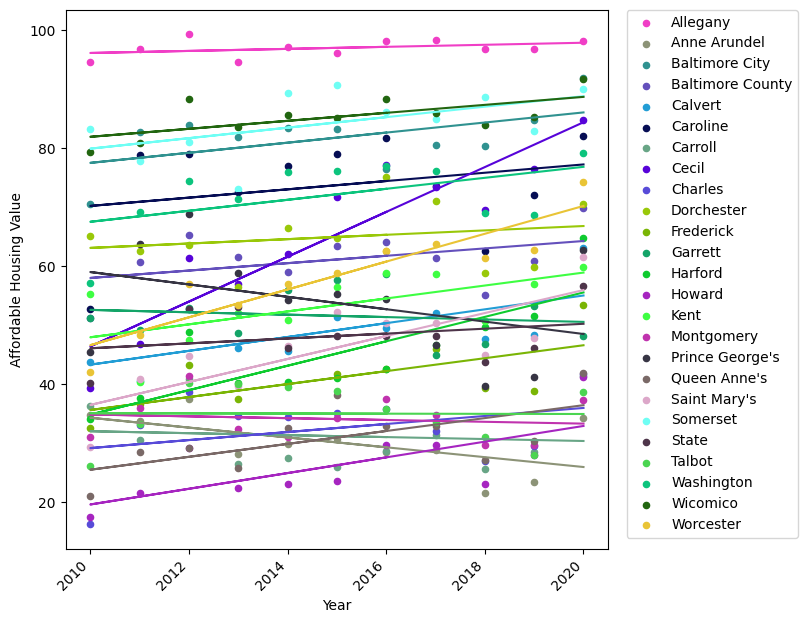

In [67]:
colors = {}
for county in table2['Jurisdiction'].values:
       colors[county] =  (np.random.random(),np.random.random(),np.random.random())
       
       
fig, ax = plt.subplots(figsize=(7, 7))
for key, group in countiesDF :
       group.plot(ax = ax, kind='scatter', y='Value', x='Year', label=key,
                     color= colors[key])
       x = group['Year'].to_numpy().reshape(-1,1)
       plt.plot( x, pred[key], color= colors[key] )

plt.legend(bbox_to_anchor = (1.35, 1) ,loc = "upper right", borderaxespad = 0)
plt.xticks(rotation = 45, ha = 'right') #so that the x-axis labels dont merge
plt.xlabel('Year')
plt.ylabel('Affordable Housing Value')
plt.show()

In [68]:
table2['Cost of Living'] = table1['Cost of Living Index']
table2.head()

,Jurisdiction,Value,Year,Cost of Living
0,State,48.1,2016,84.9
1,Allegany,98.2,2016,119.6
2,Anne Arundel,28.5,2016,101.3
3,Baltimore City,76.4,2016,109.9
4,Baltimore County,64.1,2016,121.7


In [71]:
res = smf.ols(formula= "Q(\"Value\") ~ Year", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.086
Date:                Sun, 28 Jan 2024   Prob (F-statistic):             0.0442
Time:                        15:17:58   Log-Likelihood:                -1219.2
No. Observations:                 275   AIC:                             2442.
Df Residuals:                     273   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1539.0948    788.186     -1.953      0.0

In [74]:
res = smf.ols(formula= "Q(\"Value\") ~ Jurisdiction ", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.08e-113
Time:                        15:18:25   Log-Likelihood:                -896.61
No. Observations:                 275   AIC:                             1843.
Df Residuals:                     250   BIC:                             1934.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [75]:
res = smf.ols(formula= "Q(\"Value\") ~ Year * Jurisdiction ", data= table2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("Value")   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     78.75
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          8.84e-117
Time:                        15:19:27   Log-Likelihood:                -822.71
No. Observations:                 275   AIC:                             1745.
Df Residuals:                     225   BIC:                             1926.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------